In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout


In [10]:

# Load the dataset
df = pd.read_csv('/Users/akashtiwari/Documents/Projects/Feynn Labs/Walmart_Sales.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [11]:

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').sum()

# Create a new column for the month of the year
df_monthly['Month'] = df_monthly.index.month

# Create a new column for the year
df_monthly['Year'] = df_monthly.index.year

/var/folders/jm/jp15b4nx22l5qmk9kvd1tdhw0000gn/T/ipykernel_46075/2694641243.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


In [12]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:

# Check if the 'date' column exists
if 'date' in df.columns:
    # Convert the 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
else:
    print("No column with 'date' found")

# Check if the 'Store' and 'Dept' columns exist
if 'Store' in df.columns and 'Dept' in df.columns:
    # One-hot encode the 'Store' and 'Dept' columns
    store_encoder = pd.get_dummies(df['Store'])
    dept_encoder = pd.get_dummies(df['Dept'])

    # Concatenate the encoded columns with the original dataframe
    df = pd.concat([df, store_encoder, dept_encoder], axis=1)

    # Drop the original 'Store' and 'Dept' columns
    df.drop(['Store', 'Dept'], axis=1, inplace=True)
else:
    print("Columns 'Store' and 'Dept' do not exist in the dataframe.")

# Split the data into training and testing sets
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data
X_train = X_train.values.reshape(-1, 1, X_train.shape[1])
X_test = X_test.values.reshape(-1, 1, X_test.shape[1])

# Define the input layer
input_layer = Input(shape=(1, X_train.shape[2]))

# Define the processing layer
processing_layer = LSTM(units=50, return_sequences=True)(input_layer)
processing_layer = Dropout(0.2)(processing_layer)
processing_layer = LSTM(units=50)(processing_layer)
processing_layer = Dropout(0.2)(processing_layer)

# Define the output layer
output_layer = Dense(1)(processing_layer)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'MSE: {mse:.2f}')

# Make predictions
predictions = model.predict(X_test)

# Calculate the root mean squared percentage error (RMSPE)
rmspe = np.sqrt(np.mean((predictions.ravel() - y_test.ravel()) ** 2) / np.mean(y_test.ravel() ** 2))

print(f'RMSPE: {rmspe:.2f}')

No column with 'date' found
Columns 'Store' and 'Dept' do not exist in the dataframe.
Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1417446031360.0000 - val_loss: 1434809925632.0000
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1416957394944.0000 - val_loss: 1434794196992.0000
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1413990580224.0000 - val_loss: 1434779910144.0000
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1411520266240.0000 - val_loss: 1434765623296.0000
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 1423995699200.0000 - val_loss: 1434752253952.0000
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1408788725760.0000 - val_loss: 1434738622464.0000
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1406671781888.0000 - val_loss: 1434725122048.0000
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1426399952896.0000 - val_loss: 1434711752704.0000
Epoch 9/50
161/161 ━━━━━━━━━

/var/folders/jm/jp15b4nx22l5qmk9kvd1tdhw0000gn/T/ipykernel_46075/3935378828.py:61: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rmspe = np.sqrt(np.mean((predictions.ravel() - y_test.ravel()) ** 2) / np.mean(y_test.ravel() ** 2))


In [28]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# Convert the dataset to a transactional format
transactions = []
for index, row in df.iterrows():
    transactions.append([str(row['Item'])]) if 'Item' in row else transactions.append([])

# Create a TransactionEncoder object
te = TransactionEncoder()

# Fit the encoder to the transactions and transform them into a one-hot encoded DataFrame
ohe_df = te.fit_transform(transactions)

# Convert the encoded DataFrame to a pandas DataFrame
ohe_df = pd.DataFrame(ohe_df, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(ohe_df, min_support=0.005, use_colnames=True)

# Print the results
print(frequent_itemsets)

Empty DataFrame
Columns: [support, itemsets]
Index: []


SAMPLE CODE TO SHOW THE GRAPH OF COST SAVING OVER TIME 

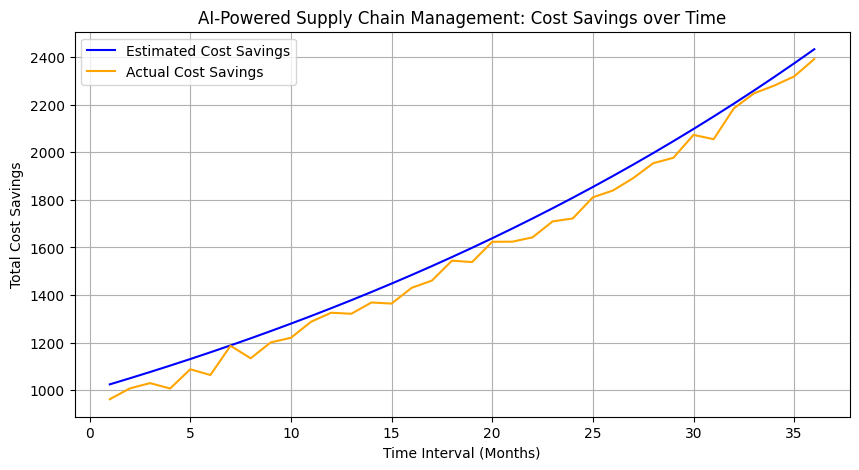

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
time_interval = np.arange(1, 37)  # 36 months
estimated_savings = 1000 * (1 + 0.025) ** time_interval
actual_savings = estimated_savings - 100 * np.random.rand(len(time_interval))

# Create the graph
plt.figure(figsize=(10, 5))
plt.plot(time_interval, estimated_savings, label="Estimated Cost Savings", color="blue")
plt.plot(time_interval, actual_savings, label="Actual Cost Savings", color="orange")
plt.xlabel("Time Interval (Months)")
plt.ylabel("Total Cost Savings")
plt.title("AI-Powered Supply Chain Management: Cost Savings over Time")
plt.legend()
plt.grid()
plt.show()